In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from util import provas, params_inep, irt_params_to_enem_scale,item_info_inep, PL3, iteminfo, testinfo

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%load_ext autoreload
%autoreload 2

In [146]:
def PL3_fig(a=1,b=0,c=0.2):
    thetas = np.arange(-3,3,0.01)
    ax = sns.lineplot(x=thetas,y=PL3(thetas,a,b,c))
    ax.set_ylim(0,1)
    ax.set_xlim(min(thetas),max(thetas))

    return
    
interact(PL3_fig,a=(0.1,10,0.1),b=(-1,1,0.5))

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.1), FloatSlider(value=0.0, descr…

<function __main__.PL3_fig(a=1, b=0, c=0.2)>

In [147]:
def iteminfocurve(a,b,c):
    thetas = np.arange(-3,3,0.01)
    cii = iteminfo(thetas,a,b,c)
    ax = sns.lineplot(x=thetas,y=cii)
    ax.set_ylim(0)

a = widgets.FloatSlider(
    value = 1,
    min = 0,
    max = 10,
    description = 'discriminação do item'
)
b = widgets.FloatSlider(value=0,min = -3,max= 4,step=0.1)
interactive(iteminfocurve,a=a,b=b,c=0.2)

interactive(children=(FloatSlider(value=1.0, description='discriminação do item', max=10.0), FloatSlider(value…

In [148]:
provas(2020,'CN',pickone=True)

np.int64(599)

In [149]:
def eneminfo(ano,area):
    thetas = np.arange(-3,3,0.01)
    items = params_inep(prova=provas(ano,area,pickone=True))
    sns.lineplot(x=thetas,y=testinfo(thetas,items))

ano = widgets.Dropdown(options = range(2009,2024),value=2019,description = "Ano")
area = widgets.Dropdown(options = ['MT','CH','CN'],value = 'MT',description = "Area")
interact(eneminfo,area=area,ano=ano)

interactive(children=(Dropdown(description='Ano', index=10, options=(2009, 2010, 2011, 2012, 2013, 2014, 2015,…

<function __main__.eneminfo(ano, area)>

In [150]:
items = params_inep(prova=provas(2019,'MT',pickone=True))

random.sample(range(44),2)

[37, 1]

In [151]:
items = params_inep(prova=provas(2019,'MT',pickone=True))

#items = items.sort_values('b_inep',ascending=False)
#bmax = items.iloc[0,1]
#items = items.sort_values('a_inep',ascending=True)
#amax = items.iloc[0,0]
b = widgets.FloatSlider(value=0,min = -3,max=10,step=0.1)
a = widgets.FloatSlider(value=1,min = 0,max= 10,step=0.1)
c = widgets.FloatSlider(value=0.2,min = 0,max= 1,step=0.1)

b1 = widgets.FloatSlider(value=0,min = -3,max=10,step=0.1)
a1 = widgets.FloatSlider(value=1,min = 0,max= 10,step=0.1)
c1 = widgets.FloatSlider(value=0.2,min = 0,max= 1,step=0.1)

def cit(a,b,c,a1,b1,c1,items):
    thetas = np.arange(-2,4,0.01)
    items_novos = items.copy()
    i1,i2 = random.sample(range(len(items)),2)
    items_novos.iloc[i1,:] = (a,b,c,1)
    items_novos.iloc[i2,:] = (a1,b1,c1,1)
    sns.lineplot(x=thetas,y=testinfo(thetas,items_novos))
    plt.grid()
    return items_novos
interact(cit,a=a,b=b,c=c,a1=a1,b1=b1,c1=c1,items=fixed(items))

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0), FloatSlider(value=0.0, description='b…

<function __main__.cit(a, b, c, a1, b1, c1, items)>

In [314]:
def syntestinfo(a,bmin,bmax,c,N=45):
    thetas = np.arange(-3,3,0.01)
    aa = np.ones(N)*a
    bb = np.arange(bmin,bmax,(bmax-bmin)/N)
    cc = np.ones(N)*c
    uu = np.ones(N)
    items = pd.DataFrame({'a_inep':aa,'b_inep':bb,'c_inep':cc,'u':uu})
    sns.lineplot(x=thetas,y=testinfo(thetas,items))

bb = np.arange(-1,2,(2+1)/94)


In [315]:
interactive(syntestinfo,a=2,bmin=-1,bmax=2,c=0.2,N=45)

interactive(children=(IntSlider(value=2, description='a', max=6, min=-2), IntSlider(value=-1, description='bmi…

## Usar parâmetros TRI dos itens reais
As distribuições dos parâmetros de $a, b$ e $c$ nos últimos anos, entre 2009 e 2024) dão uma indicação quais são valor realistas para, em particular, o parâmetro de discriminação $a$. Fica difícil de argumentar que é viável montar um ENEM com determinada curva de informação do teste desejada, se na prática não é possível criar itens com qualquer parâmetro $a$.

In [2]:
def get_irt_params(area):
    l = []
    for ano in range(2009,2025):
        l.append(params_inep(ano=ano,area=area,dropna=True))
    return pd.concat(l)
params = get_irt_params('MT')

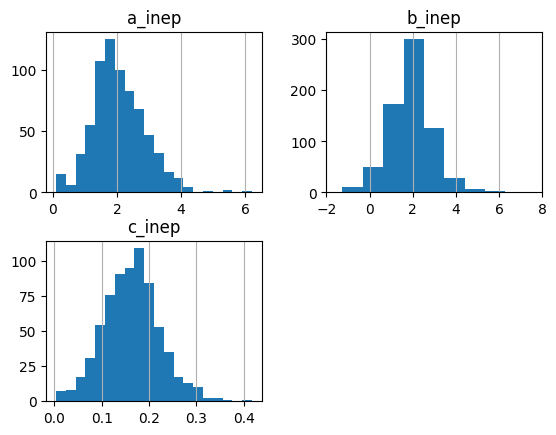

In [37]:
axs = params.hist(column=['a_inep','b_inep','c_inep'],bins=20);
axs[0,1].set_xlim(-2,8)
for ax in axs.flatten():
    ax.grid(axis='y')

In [211]:
def sample_irt_params(param='a_inep',min_value=None,max_value=None,n=5):
    samples = params[param]

    if min_value is not None:
        samples = samples[samples > min_value]
    if max_value is not None:
        samples = samples[samples < max_value]
    if len(samples) > 1:
        samples = samples.sample(n,replace=True)
    return samples
    
s= sample_irt_params(param='b_inep',max_value=0,n=10)
params.loc[s.index]

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
15453,2.13200,-0.04800,0.17600,1
111491,1.25662,-0.40358,0.20406,1
51315,1.87432,-0.18327,0.10130,1
82724,1.58670,-0.08552,0.20086,1
41659,1.44654,-0.39957,0.20014,1
10823,1.48300,-0.25200,0.19700,1
70114,1.66379,-0.71560,0.05682,1
14712,1.06024,-0.23853,0.20527,1
82724,1.58670,-0.08552,0.20086,1


In [207]:
area = 'MT'
params = get_irt_params(area)

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
60229,3.40407,2.10238,0.10698,1
60226,2.70316,1.28868,0.13945,1
60227,2.45160,2.26159,0.07674,1
60228,2.18226,2.25808,0.24918,1
60231,2.86703,1.91260,0.19442,1
...,...,...,...,...
29740,2.86713,1.62276,0.15323,1
29021,2.79303,2.04988,0.25041,1
76177,2.73571,1.22835,0.14646,1


In [213]:
items = sample_irt_params(param='b_inep',max_value=0,n=1)
items

CO_ITEM
59484   -0.96661
Name: b_inep, dtype: float64

In [221]:
normalitems = params.sample(40)
s = sample_irt_params(param='b_inep',max_value=0,n=5)
easyitems = params.loc[s.index]
items = pd.concat([normalitems,easyitems])
items.sort_values('b_inep')

,a_inep,b_inep,c_inep,u
CO_ITEM,,,,
40768,1.72864,-0.40621,0.19395,1
10823,1.48300,-0.25200,0.19700,1
14712,1.06024,-0.23853,0.20527,1
60441,1.42701,-0.02398,0.11013,1
60441,1.42701,-0.02398,0.11013,1
30455,3.22711,0.34727,0.17002,1
10472,2.87000,1.30000,0.04300,1
37576,2.48037,1.40250,0.20245,1
70765,3.86617,1.45961,0.11213,1


In [304]:
area = 'CN'
params = get_irt_params(area)

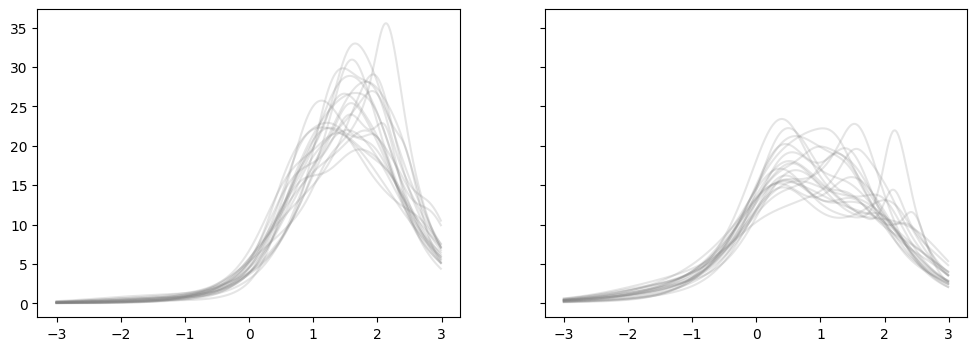

In [320]:
def syntestinfo_from_real_items(N = 45,easy=0,reps=20):
    thetas = np.arange(-3,3,0.01)

    for i in range(reps):
        normalitems = params.sample(N-easy)
        s = sample_irt_params(param='b_inep',max_value=0.5,n=easy)
        easyitems = params.loc[s.index]
        items = pd.concat([normalitems,easyitems])
        sns.lineplot(x=thetas,y=testinfo(thetas,items),color='gray',alpha=0.2)

fig, axs = plt.subplots(1,2,sharey=True,sharex=True, figsize=(12,4))
plt.sca(axs[0])
syntestinfo_from_real_items(easy=0)
plt.sca(axs[1])
syntestinfo_from_real_items(easy=25)